In [2]:
import os
from gensim.models import word2vec
import json
from nltk.corpus import stopwords
from string import ascii_lowercase
import string
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import ast
import json
import matplotlib.pyplot as plt
import operator

data_list = os.listdir(os.getcwd())

Using TensorFlow backend.


In [3]:
def slidingWindow(sequence,winSize,step=1):
    """Returns a generator that will iterate through
    the defined chunks of input sequence.  Input sequence
    must be iterable."""
 
    # Verify the inputs
    try: it = iter(sequence)
    except TypeError:
        raise Exception("**ERROR** sequence must be iterable.")
    if not ((type(winSize) == type(0)) and (type(step) == type(0))):
        raise Exception("**ERROR** type(winSize) and type(step) must be int.")
    if step > winSize:
        raise Exception("**ERROR** step must not be larger than winSize.")
    if winSize > len(sequence):
        raise Exception("**ERROR** winSize must not be larger than sequence length.")
 
    # Pre-compute number of chunks to emit
    numOfChunks = ((len(sequence)-winSize)/step)+1
 
    # Do the work
    for i in range(0,numOfChunks*step,step):
        yield sequence[i:i+winSize]

In [21]:
data_list
df = pd.DataFrame()
list_of_df = []
for datum in data_list:
    if datum[-3:] == 'csv':
        convert = pd.read_csv(datum, encoding="utf-8")#, as_recarray=True)
        list_of_df.append(convert)
        
df = pd.concat(list_of_df)

In [22]:
df.head()

,Date Posted,Title,Journal,Authors,Link,Abstract,Text,Twitter
0,"November 14, 2013",The evolution of sex differences in disease ge...,Trends in Genetics,"[(Gilks, William P, University of Sussex), (A...",https://doi.org/10.1101/000414,There are significant differences in the biolo...,/Users/lynnyi/Documents/Projects/biorxiv-data-...,"[( 15 Nov 2013 , 2)]"
1,"November 14, 2013",Sampling principles for biodiversity study,Pre print,"[(Pan, Xubin, Chinese Academy of Inspection a...",https://doi.org/10.1101/000364,Sampling is a fundamental tool in ecology and ...,/Users/lynnyi/Documents/Projects/biorxiv-data-...,"[( 15 Nov 2013 , 3)]"
2,"November 13, 2013",On the Reproducibility of TCGA Ovarian Cancer ...,PLOS ONE,"[(Wan, Ying-Wooi, Baylor College of Medicine)...",https://doi.org/10.1101/000315,Dysregulated microRNA (miRNA) expression is a ...,/Users/lynnyi/Documents/Projects/biorxiv-data-...,"[( 11 Dec 2013 , 1), ( 13 Nov 2013 , 2), ( 18 ..."
3,"November 12, 2013",Population genomics of parallel hybrid zones i...,Genome Research,"[(Nadeau, Nicola, University of Cambridge), (...",https://doi.org/10.1101/000208,Hybrid zones can be valuable tools for studyin...,/Users/lynnyi/Documents/Projects/biorxiv-data-...,"[( 06 Dec 2016 , 1), ( 17 Nov 2013 , 2), ( 28 ..."
4,"November 12, 2013",A Complete Public Domain Family Genomics Dataset,Pre print,"[(Corpas, Manuel, Independent), (Cariaso, Mik...",https://doi.org/10.1101/000216,BACKGROUND: The availability of open access ge...,/Users/lynnyi/Documents/Projects/biorxiv-data-...,"[( 29 Jun 2014 , 1), ( 15 Nov 2013 , 6), ( 04 ..."


In [23]:
df = df.reset_index(drop=True)
#df.iloc['Twitter']
twtr = df['Twitter']
jrnl = df['Journal']
twtr
sep = '), ( '
for idx in range(len(twtr)):
    replacelb = twtr[idx].replace('[', '')
    replacerb = replacelb.replace(']', '')
    replacerp = replacerb.replace(')', ' ')
    replacelp = replacerp.replace('(', '')
    replacecc = replacelp.replace(' ,', '')
    twtr[idx] = replacecc.split()
    

In [24]:
twtr[1097].remove('12:18AM')

In [25]:
twtr[422].remove( '11:41PM')
# for some reason this had a time in the data??

In [27]:
auth = df['Authors']
auth[0]
eval(auth[0])

SyntaxError: invalid syntax (<string>, line 1)

In [559]:
load = {'Paper': None, 'Dates': [None], 'Retweets':[None]}
paper_mat = pd.DataFrame([load])
for paper_num in range(len(twtr)):
    if len(twtr[paper_num]) > 1:
        A = slidingWindow(twtr[paper_num], 4, 4)
        dates = []
        rtwts = []        
        for data_entry in A:
            # write the values
            date = data_entry[0] + ' ' + data_entry[1] + ' '  + data_entry[2]
            if ":" in data_entry[0] or in data_entry[1] or in data_entry[2]
            occurance = int(data_entry[-1])
            dates.append(date)
            rtwts.append(occurance)
            paper_mat.loc[paper_mat.shape[0]] = [dates, None, rtwts]
    else:
        paper_mat.loc[paper_mat.shape[0]] = [[0], None, [0]]

Exception: **ERROR** winSize must not be larger than sequence length.

In [105]:
dates = []
rts = []
for item in twtr:
    series = item.split(',')
    for elem in range(len(series)):
        if elem%2==0:
            date = series[elem][3:-1]
            dates.append(date)
        if elem%2 ==1:
            num_rt = series[elem][1:-1]
            rts.append(num_rt)

In [294]:
doj = {}
for j in jrnl:
    if j in doj:
        doj[j]+=1
    else:
        doj[j] = 1
# sort doj

doj = dict((k,int(v)) for k,v in doj.iteritems())
#doj = sorted(doj.items(), key=operator.itemgetter(1))
#doj = np.fliplr(np.array([list(elem) for elem in doj]))
li = pd.Series(doj)
li = li.sort_values()
li = li.iloc[::-1]

In [222]:

xticks = doj[:,1][-50:-1]
y = doj[:,0][-50:-1]
x = np.arange(len(xticks))
print x

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


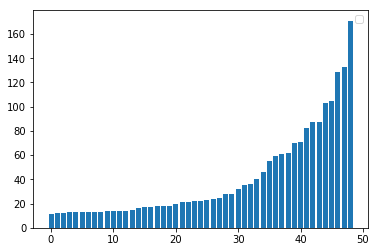

In [228]:
#plt.xticks(x, xticks)
plt.legend(xticks)
plt.bar(x, y)
plt.show()

In [303]:
li.head(50)

Pre print                                 2087
PLOS ONE                                   171
Scientific Reports                         133
Bioinformatics                             129
eLife                                      105
Genetics                                   103
PLOS Genetics                               87
PLOS Computational Biology                  87
PNAS                                        82
Nucleic Acids Research                      71
G3: Genes|Genomes|Genetics                  70
Genome Biology                              62
Nature Communications                       61
Genome Research                             59
BMC Genomics                                55
Molecular Biology and Evolution             46
BMC Bioinformatics                          40
Nature Methods                              36
Nature Genetics                             35
PeerJ                                       32
Molecular Ecology                           28
Genome Biolog

In [560]:
## plotting twitter data
paper_mat

,Dates,Paper,Retweets
0,[None],None,[None]
1,[15 Nov 2013],None,[2]
2,[15 Nov 2013],None,[3]
3,"[11 Dec 2013, 13 Nov 2013, 18 Dec 2013]",None,"[1, 2, 2]"
4,"[11 Dec 2013, 13 Nov 2013, 18 Dec 2013]",None,"[1, 2, 2]"
5,"[11 Dec 2013, 13 Nov 2013, 18 Dec 2013]",None,"[1, 2, 2]"
6,"[06 Dec 2016, 17 Nov 2013, 28 Dec 2013, 29 Jan...",None,"[1, 2, 1, 1, 1]"
7,"[06 Dec 2016, 17 Nov 2013, 28 Dec 2013, 29 Jan...",None,"[1, 2, 1, 1, 1]"
8,"[06 Dec 2016, 17 Nov 2013, 28 Dec 2013, 29 Jan...",None,"[1, 2, 1, 1, 1]"
9,"[06 Dec 2016, 17 Nov 2013, 28 Dec 2013, 29 Jan...",None,"[1, 2, 1, 1, 1]"


In [562]:
paper_mat

,Dates,Paper,Retweets
0,[None],None,[None]
1,[15 Nov 2013],None,[2]
2,[15 Nov 2013],None,[3]
3,"[11 Dec 2013, 13 Nov 2013, 18 Dec 2013]",None,"[1, 2, 2]"
4,"[11 Dec 2013, 13 Nov 2013, 18 Dec 2013]",None,"[1, 2, 2]"
5,"[11 Dec 2013, 13 Nov 2013, 18 Dec 2013]",None,"[1, 2, 2]"
6,"[06 Dec 2016, 17 Nov 2013, 28 Dec 2013, 29 Jan...",None,"[1, 2, 1, 1, 1]"
7,"[06 Dec 2016, 17 Nov 2013, 28 Dec 2013, 29 Jan...",None,"[1, 2, 1, 1, 1]"
8,"[06 Dec 2016, 17 Nov 2013, 28 Dec 2013, 29 Jan...",None,"[1, 2, 1, 1, 1]"
9,"[06 Dec 2016, 17 Nov 2013, 28 Dec 2013, 29 Jan...",None,"[1, 2, 1, 1, 1]"


In [563]:
paper_mat.drop(0, inplace=True)

In [575]:
dates = paper_mat['Dates']
retweets = paper_mat['Retweets']

In [586]:
for num in range(1,len(dates)):
    tmp_retweets = pd.Series(retweets[num], index=pd.to_datetime(dates[num]))
    tmp_retweets.plot(kind='scatter')
plt.show()

ValueError: plot kind 'scatter' can only be used for data frames